# 01 - Image Classification for Clothing Images using tf.keras

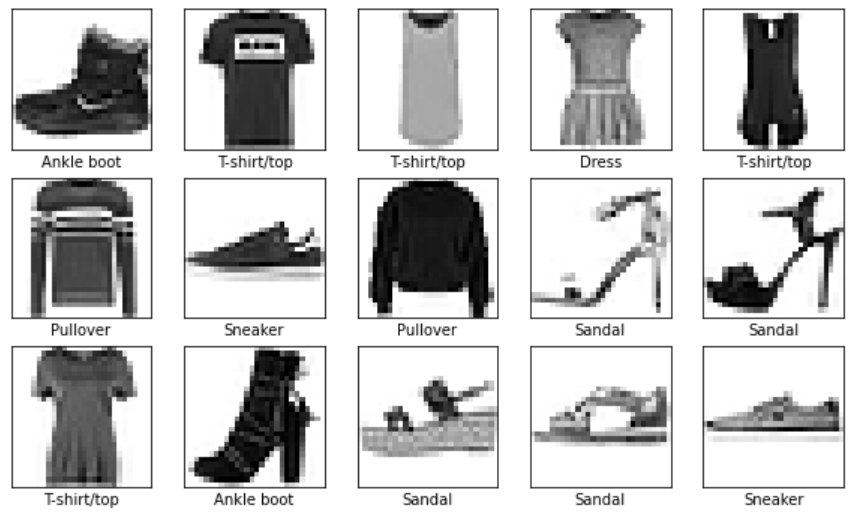

This notebook contains the code and explanations on how to train a simple Convolutional Neural Network (CNN) with Keras on the Fashion MNIST dataset, giving hands-on experience working with the Keras library. Points to remember:

- Fashion-MNIST is a dataset of Zalando’s fashion article images —consisting of a training set of `60,000` examples and a test set of `10,000` examples. Each instance is a 28×28 grayscale image, associated with a label.

- This dataset consists of `10` classes



- Here the tensorflow model which we built in this notebook, will predict the correct label(class) for the image passed

# 1 - Setup

### Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

2022-02-18 17:16:10.794771: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-18 17:16:10.794815: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import tensorflow as tf
print('TensorFlow version: {}'.format(tf.__version__))
from tfx import v1 as tfx 
print('TFX version: {}'.format(tfx.__version__))

TensorFlow version: 2.7.1
TFX version: 1.6.1


# 2 - Preparing the data

### Loading Fashion MNIST Dataset
In this notebook, we will Load the Fashion MNIST dataset from `tf.keras.datasets`

In [3]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
# Print the number of training and test datasets
print('size of training set', x_train.shape[0])
print('size of test set', x_test.shape[0])

size of training set 60000
size of test set 10000


### Visualize the data

You can visualize an image from the training data set with matplotlib library’s `imshow()` to take a look at one of the images from the datasets. 

- Note each image is gray scale in the shape of `28x28`.

In [5]:
# For convenience we will assign descriptive text for each label:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

y = 5 Sandal


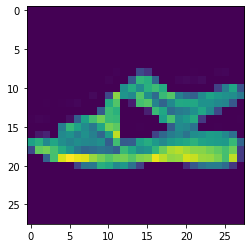

In [6]:
# Image index, you can pick any number between 0 and 59,999
img_index = 43
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

### Preprocessing 

In Preprocessing we do the following 3 steps:
#### 1. Image Resizing

We want to feed model a fixed input image vector i.e. of size 28x28 pixels therefore we are resizing the images which might be above or below the required input range

In [7]:
print(x_train[img_index].shape)

(28, 28)


W= 28 Image Width 
<br> H = 28 Image Height




#### 2. Reshaping the Input

Reshaping is done to shape the input vector in the required shape so that our Neural Network will be able to take it as input and process it. We need to reshape the input and it should be of size
`[image_height, image_width, channels]` 
- Since we are having `grey scale` images, the number of channels should be `1`.

In [8]:
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

#### 3. Scaling

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255. Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way

We know that the pixel values for each image in the dataset are integers that range from `0 (black) to 256 (white)`. Each number represents a color code. When using the image as it is and passing through a Deep Neural Network, the computation of high numeric values may become more complex.
To reduce this we can `normalize` the values to range from 0 to 1.

In this way, the numbers will be small and the computation becomes easier and faster.
As the pixel values range from 0 to 256, apart from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to 1.


In [9]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

- To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

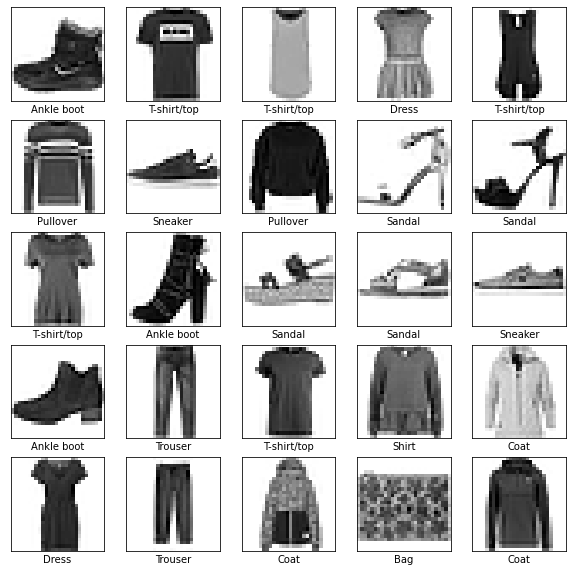

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(fashion_mnist_labels[y_train[i]])
plt.show()

### Split the data into train/validation/test datasets

In the earlier step of importing the data, we had `60,000` images for training and `10,000` test images. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:
- Training data — used for training the model (Using 50,000 Images)
- Validation data — used for tuning the hyperparameters and evaluate the models (Using 10,000 Images)
- Test data — used to test the model after the model has gone through initial vetting by the validation set. (Using 10,000 Images)

In [11]:
(x_train, x_valid) = x_train[:50000], x_train[50000:] 
(y_train, y_valid) = y_train[:50000], y_train[50000:]

In [12]:
len(x_train), len(x_valid), len(y_train), len(y_valid)  # verify train-validation split count

(50000, 10000, 50000, 10000)

### One-Hot Encoding Labels (Output Categories) 
- We are One-hot encoding the labels because we have less number of categories which can be differentiated with one hot encoding method, if we have large number of classes then one-hot encoding will be tedious and impractical to use
-`categorical_crossentropy` expect labels to be provided in a one_hot representation.

In [13]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

- Train dataset size
- Validation dataset size
- Test dataset size

In [14]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (50000, 28, 28, 1) y_train shape: (50000, 10)
50000 train set
10000 validation set
10000 test set


# 3 - Model Building 

### Create the model architecture
- In this notebook we are using the Sequential Model API to create a simple CNN model repeating a few layers of a Convolution Layer followed by a Pooling Layer then a BatchNormalization. 

- In the architecture, we are creating stack of Conv2D and MaxPooling2D layers.

- As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (28, 28, 1), which is the format of Input Image. You can do this by passing the argument input_shape to your first layer.


- `Note`: You only need to define the input data shape with the first layer. The last layers is a dense layer with softmax activation that classifies the 10 categories of data in fashion_mnist.

- Building the neural network requires configuring the layers of the model, then compiling the model.

- The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. 

- `keras.layers.Conv2D`
    - This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
    - When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers or None, does not include the sample axis), e.g. input_shape=(28, 28, 1) 
    - `filters`: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
    - `kernel_size`: the kernel is nothing but a filter that is used to `extract the features from the images`. The kernel is a matrix that moves over the input image data, performs the dot product with the sub-region of input data, and gets the output as the matrix of dot products.
        - An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
    - `padding`: Padding Methods are as "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding with zeros padded evenly to the left/right or up/down of the input. When padding="same" and strides=1, the output has the same size as the input.
    - `activation`: Activation function decides, whether a neuron should be activated or not.
        - `relu function`:The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero
            - With default values, this returns the standard ReLU activation: max(x, 0), the element-wise maximum of 0 and the input tensor.
            - The rectified linear activation function overcomes the `vanishing gradient` problem, allowing models to learn faster and perform better.
        - `Softmax` The softmax function is used as the activation function in the `output layer` of neural network models that predict a `multinomial` probability distribution. That is, softmax is used as the activation function for `multi-class classification` problems where class membership is required on more than two class labels.

- `MaxPooling:` Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network. Max Pooling is used to extract the dominant pixel value from the selected kernel size.
    - Since the convolutional layers are 2d here, We're using the MaxPooling2D layer from Keras, but Keras also has 1d and 3d max pooling layers as well.
- `Batch normalization`: Batch normalization is a layer that allows every layer of the network to do learning more `independently`. It is used to normalize the output of the previous layers. Using batch normalization learning becomes efficient also it can be used as regularization to avoid `overfitting` of the model

    - Applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.

- Creating a Sequential model API 

In [ ]:
#### TASK 1 ####

"""
Build a Sequential model by adding 3 stacks of Conv2D layer
When using this layer as the first layer in a model, provide the keyword argument input_shape 
(tuple of integers; e.g. input_shape=(128, 128, 1))

"""

model = tf.keras.Sequential()

"""

Layer1: Conv2d layer use filters=32, kernel_size=2, padding='same' define activation='relu' 
Layer2: Maxpool2d layer with pool_size=2
Layer3: Batch normalization

Layer4: Conv2d layer use filters=32, kernel_size=2, padding='same' define activation='relu' 
Layer5: Maxpool2d layer with pool_size=2
Layer6: Batch normalization

Layer7: Conv2d layer use filters=32, kernel_size=2, padding='same' define activation='relu' 
Layer8: Maxpool2d layer with pool_size=2
Layer9: Batch normalization

Followed by flatten and dense layers. In the dense layer use kernel=10 and activation="softmax".

For refrence : https://keras.io/api/layers/convolution_layers/convolution2d/

Please look at the below Architecture diagram for reference.
"""

`summary()`: Is to print a useful summary of the model, which includes: Name and type of all layers in the model. Output shape for each layer. Number of weight parameters of each layer and The total number of trainable and non-trainable parameters of the model.

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                        

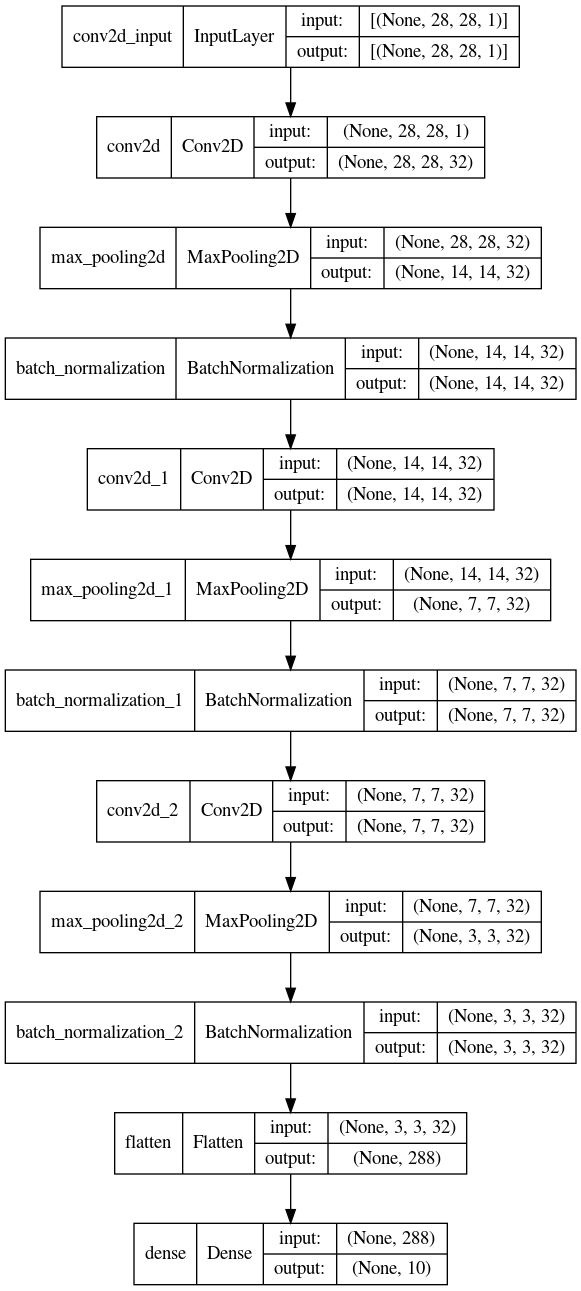

In [17]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step below:

- `Loss function` —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
    - it is recommended to use `categorical_crossentropy` for multi-class(classes are mutually exclusive) problem but binary_crossentropy for multi-label problem
    - targets should be encoded as one-hot vectors.
- `Optimizer` —This is how the model is updated based on the data it sees and its loss function.
    - Optimizers are Classes or methods used to change the attributes of your machine/deep learning model such as weights and learning rate in order to reduce the losses
    - `Adam` is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.
- `Metrics` —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.
    - A metric is a function that is used to judge the performance of your model. Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model

In [18]:
#### TASK 2 ####

model.compile(    
    '''
    Parameters
    ----------
    optimizer : The method to train your model to improve training speed and performance.
                eg: Adam, RMSprop, SGD etc.
    
    loss : Measures how accurate the model is during training. Minimize this function to 
           steer the model in the right direction. 
           eg: BinaryCrossentropy class, CategoricalCrossentropy class etc.
    
    metrics : A metric is a function that is used to judge the performance of your model.
              eg: Accuracy, Precision, Recall, Mean Squared Error, Mean Absolute Error etc.
    
    For reference : https://keras.io/api/models/model_training_apis/
    '''

             loss = "DEFINE",
             optimizer = "DEFINE",
             metrics = "DEFINE" )
# By "DEFINE" we mean to include the loss function, optimizer and the required metrices 

`ModelCheckpoint` callback is used in conjunction with training using `model.fit()` to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

In [19]:
from keras.callbacks import ModelCheckpoint

In [20]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

# 4 - Train the model
Training the neural network model requires the following steps:

1) Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
2) The model learns to associate images and labels.
3) You ask the model to make predictions about a test set—in this example, the test_images array.
4) Verify that the predictions match the labels from the test_labels array.

### Fit the model
To start training, call the `model.fit()` method—so called because it "fits" the model to the training data:

The `batch size` is a number of samples processed before the model is updated. The number of `epochs` is the number of complete passes through the training dataset. The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.

`ModelCheckpoint callback` is used in conjunction with training using model. fit()to save a model or weights (in a checkpoint file) at some interval, so the model or weights 
can be loaded later to continue the training from the state saved

In [21]:
#### TASK 3 ####

model.fit( 
         "ENTER HERE",
         "ENTER HERE",
         batch_size = "ENTER HERE",
         epochs = "ENTER HERE",
         validation_data = ("ENTER HERE", "ENTER HERE"),
         callbacks = ["ENTER HERE"]
    '''
    Parameters
    ----------
    x_train : Train Dataset of Array of images
    
    y_train : Train Dataset of Labels
    
    batch_size : integer; The number of training examples utilized in one iteration
    
    epochs : integer; Number of passes of the entire training dataset the algorithm has completed.
    
    validation_data : Validation Dataset of Array of images and Labels
    
    callbacks : It is executed during a specific instant while training a model.
                eg: Base Callback class, EarlyStopping, ModelCheckpoint ,TensorBoard etc.
     
     For reference : https://keras.io/api/models/model_training_apis/
     '''
)

Epoch 1/10
781/782 [============================>.] - ETA: 0s - loss: 0.4699 - accuracy: 0.8317 - precision: 0.8845 - recall: 0.7851
Epoch 00001: val_loss improved from inf to 0.35124, saving model to model.weights.best.hdf5
782/782 [==============================] - 23s 29ms/step - loss: 0.4699 - accuracy: 0.8317 - precision: 0.8845 - recall: 0.7850 - val_loss: 0.3512 - val_accuracy: 0.8741 - val_precision: 0.9033 - val_recall: 0.8432
Epoch 2/10
780/782 [============================>.] - ETA: 0s - loss: 0.3099 - accuracy: 0.8883 - precision: 0.9096 - recall: 0.8703
Epoch 00002: val_loss improved from 0.35124 to 0.30558, saving model to model.weights.best.hdf5
782/782 [==============================] - 22s 28ms/step - loss: 0.3099 - accuracy: 0.8883 - precision: 0.9096 - recall: 0.8703 - val_loss: 0.3056 - val_accuracy: 0.8878 - val_precision: 0.9074 - val_recall: 0.8705
Epoch 3/10
781/782 [============================>.] - ETA: 0s - loss: 0.2746 - accuracy: 0.8988 - precision: 0.9172 

### Best model is loaded
- Load the weights with the best validation accuracy

In [22]:
model.load_weights('model.weights.best.hdf5')

### Test accuracy
- The model. evaluate function predicts the output for the given input and then computes the metrics function specified in the model. compile and based on `y_true` and `y_pred` and returns the computed metric value as the output.
- Evaluate the model on test set

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.902400016784668


### Make predictions
- `model.predict()` : given a trained model, predict the label of a new set of data. This method accepts one argument, the new data X_new (e.g.in our case `x_test` ), and returns the learned label for each object in the array.
- checking the test set results

In [24]:
y_predictions = model.predict(x_test)

We got y_predictions = 10,000 test images prediction with 10 class confidence along with their prediction as follows

In [25]:
y_predictions.shape

(10000, 10)

Lets look at first test image and its output score prediction for each class

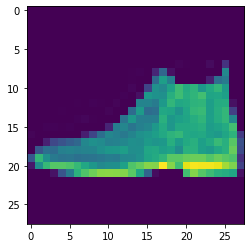

In [26]:
plt.imshow(x_test[0])

In [27]:
y_predictions[0]

array([2.1019453e-08, 5.3998840e-11, 5.1306554e-08, 1.6699514e-09,
       6.0666986e-07, 5.7396358e-03, 3.9902599e-08, 1.3079542e-03,
       2.2729746e-06, 9.9294949e-01], dtype=float32)

In Above output i.e. y_predictions[0], is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value with np.argmax function

In [28]:
predicted_class_index = np.argmax(y_predictions[0])
predicted_class_index

9

We got 9 as predicted class index, lets check what is the name of the class for that particular index output value

In [29]:
fashion_mnist_labels[predicted_class_index]

'Ankle boot'

So, we can say that predicted output is matching with the actual class output i.e 'Ankle boot', which is the first test image in our case

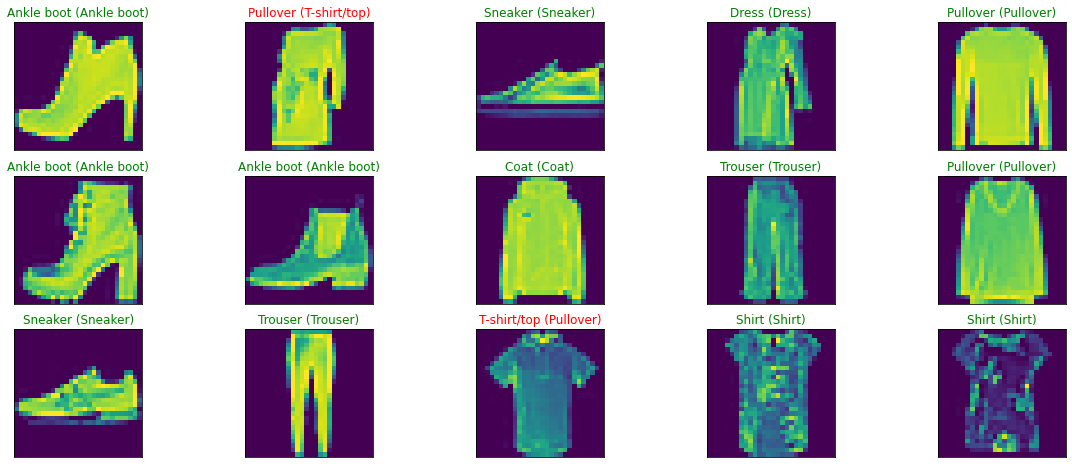

In [30]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_predictions[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

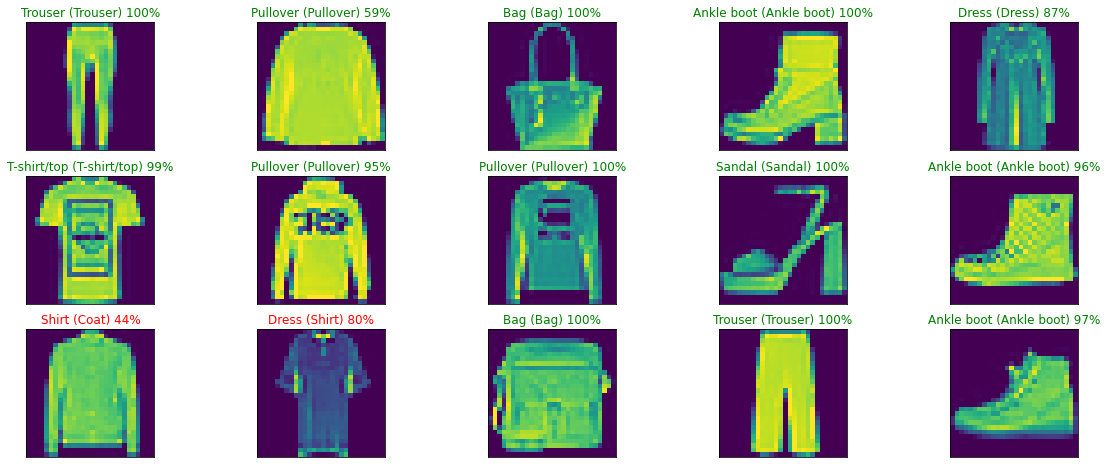

In [31]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_predictions[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({}) {:2.0f}%".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index],
                                  100*np.max(y_predictions[index])),
                                  color=("green" if predict_index == true_index else "red"))